# Set Membership

The cell below defines two **abstract classes**: the first represents a set and basic insert/search operations on it. You will need to impement this API four times, to implement (1) sequential search, (2) binary search tree, (3) balanced search tree, and (4) bloom filter. The second defines the synthetic data generator you will need to implement as part of your experimental framework. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [1]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

# abstract class to represent a set and its insert/search operations
class AbstractSet(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # inserts "element" in the set
    # returns "True" after successful insertion, "False" if the element is already in the set
    # element : str
    # inserted : bool
    @abstractmethod
    def insertElement(self, element):     
        inserted = False
        return inserted   
    
    # checks whether "element" is in the set
    # returns "True" if it is, "False" otherwise
    # element : str
    # found : bool
    @abstractmethod
    def searchElement(self, element):
        found = False
        return found    
    
    
    
# abstract class to represent a synthetic data generator
class AbstractTestDataGenerator(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # creates and returns a list of length "size" of strings
    # size : int
    # data : list<str>
    @abstractmethod
    def generateData(self, size):     
        data = [""]*size
        return data


Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [2]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE

class TreeNode_BinarySearchTree():
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class TreeNode_BalancedSearchTree():
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.top = None
        self.color = "red"

# Helper Function for hashmap
def hashFunction(self, string):
    hash_values = []
    hash1 = hash(string)
    hash2 = hash(str(hash1) + string)
    for i in range(self.hash_count):
        value = (hash1 + i * hash2) % self.size
        hash_values.append(value)
    return hash_values

Use the cell below to implement the requested API by means of **sequential search**.

In [3]:
class SequentialSearchSet(AbstractSet):
    def __init__(self):
        # ADD YOUR CODE HERE
        self.data = []        
     
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
        if element in self.data:
            return inserted
        else:
            self.data.append(element)
            self.data.sort()
            inserted = True
            return inserted
          

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE
        for i in range (len(self.data)):
            if self.data[i] == element:
                found = True
                break
        return found

Use the cell below to implement the requested API by means of **binary search tree**.

In [9]:
class BinarySearchTreeSet(AbstractSet):
    def __init__(self):
        self.root = None
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
        new_node = TreeNode_BinarySearchTree(element)
        if self.root is None:
            self.root = new_node
            inserted = True
        else:
            current = self.root
            while True:
                if element < current.value:
                    # check the left when the element want to insert is smaller
                    if current.left is None:
                        current.left = new_node
                        inserted = True
                        break
                    else:
                        # move to the left
                        current = current.left
                elif element > current.value:
                    # check the right when the element want to insert is smaller
                    if current.right is None:
                        current.right = new_node
                        inserted = True
                        break
                    else:
                        # move to the right
                        current = current.right
                else:
                    # element is already in the tree
                    break
        return inserted
    
    def searchElement(self, element):
        found = False
        # ADD YOUR CODE HERE
        current = self.root
        while current is not None:
            if element == current.value:
                found = True
                break
            elif element < current.value:
                # move to the left if the element want to find is smaller
                current = current.left
            else:
                # move to the right if the element want to find is larger
                current = current.right
        return found

Use the cell below to implement the requested API by means of **balanced search tree**.

In [13]:
class BalancedSearchTreeSet(AbstractSet):
    
    def __init__(self):
        self.root = None       
     
    
        
    def insertElement(self, element):
        inserted = False
        if self.root is None:
            self.root = TreeNode_BalancedSearchTree(element)
            inserted = True
            return inserted
        else:
            currentNode = self.root
            while True:
                if currentNode.value == element:
                    return inserted
                elif currentNode.value > element:
                    if currentNode.left is None:
                        currentNode.left = TreeNode_BalancedSearchTree(element)
                        currentNode.left.top = currentNode
                        inserted = True
                        break
                    else:
                        currentNode = currentNode.left
                else:
                    if currentNode.right is None:
                        currentNode.right = TreeNode_BalancedSearchTree(element)
                        currentNode.right.top = currentNode
                        inserted = True
                        break
                    else:
                        currentNode = currentNode.right
            if inserted:
                while currentNode is not None:
                    if (currentNode.left is None or currentNode.left.color == "black") and currentNode.right is not None and currentNode.right.color == "red":
                        # left rotation 
                        tampNode= currentNode.right
                        if tampNode.left is not None:
                            currentNode.right = tampNode.left
                            tampNode.left.top = currentNode
                        else:
                            currentNode.right = None
                        if currentNode.top is not None:
                            topNode = currentNode.top
                            if topNode.left == currentNode:
                                topNode.left = tampNode
                            else:
                                topNode.right = tampNode
                        elif currentNode == self.root:
                            self.root = tampNode
                        tampNode.left = currentNode
                        tampNode.top = currentNode.top
                        currentNode.top = tampNode
                        tampNode.color = currentNode.color
                        currentNode.color = "red"
                    if currentNode.top is not None and currentNode.color == "red" and currentNode.left is not None and currentNode.left.color == "red":
                        # right rotation
                        rightNode = currentNode.top
                        currentNode.color = rightNode.color
                        rightNode.color = "red"
                        if rightNode.top is not None:
                            topNode = rightNode.top
                            if topNode.left == rightNode:
                                topNode.left = currentNode
                            else:
                                topNode.right = currentNode
                        if rightNode == self.root:
                            self.root = currentNode
                        rightNode.left = currentNode.right
                        if currentNode.right is not None:
                            currentNode.right.top = rightNode
                        currentNode.right = rightNode
                        currentNode.top = rightNode.top
                        rightNode.top = currentNode
                    if currentNode.left is not None and currentNode.left.color == "red" and currentNode.right is not None and currentNode.right.color == "red":
                        # shift color
                        currentNode.left.color = "black"
                        currentNode.right.color = "black"
                        currentNode.color = "red"
                    currentNode = currentNode.top
            return inserted


    def searchElement(self, element):     
        found = False
        currentNode = self.root
        while currentNode is not None:
            if currentNode.value == element:
                found = True
                return found
            elif currentNode.value > element:
                currentNode = currentNode.left
            else:
                currentNode = currentNode.right
        return found 

Use the cell below to implement the requested API by means of **bloom filter**.

In [320]:
class BloomFilterSet(AbstractSet):
    
    def __init__(self):
        # ADD YOUR CODE HERE
        self.size = size
        self.hash_count = has_count
        self.bit_array = [0] * size
    
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
        for seed in range(self.hash_count):
            result = self.hashFunction(seed, element) % self.size
            self.bit_array[result] = 1
        
        inserted = True
        return inserted
    

    def searchElement(self, element):
        found = True
        # ADD YOUR CODE HERE
        for seed in range(self.hash_count):
            result = self.hashFunction(seed, element) % self.size
            if self.bit_array[result] == 0:
                found = False
                break
        return found

Use the cell below to implement the **synthetic data generator** as part of your experimental framework.

In [5]:
import string
import random

class TestDataGenerator(AbstractTestDataGenerator):
    
    def __init__(self):
        # ADD YOUR CODE HERE
        pass           
        
    def generateData(self, size):     
        # ADD YOUR CODE HERE
        data = []
        # loop size times
        for i in range(size):
            # generate a random string of random length between 1 and 10
            rand_len_str = random.randint(1, 10)
            rand_str = ''.join(random.choices(string.ascii_letters, k = rand_len_str))
            # add the string to the set
            data.append(rand_str)        
        return data

Use the cells below for the python code needed to **fully evaluate your implementations**, first on real data and subsequently on synthetic data (i.e., read data from test files / generate synthetic one, instantiate each of the 4 set implementations in turn, then thorouhgly experiment with insert/search operations and measure their performance).

In [12]:
import timeit

# The following lists store the data of insert and search time of different files.
# [0] is the data for file "test1-mobydick.txt"
# [1] is the data for file "test2-warpeace.txt"
# [2] is the data for file "test3-dickens.txt"

ss = SequentialSearchSet()
ss_insert_time_data = []
ss_search_time_data = []

bst = BinarySearchTreeSet()
bst_insert_time_data = []
bst_search_time_data = []

bal = BalancedSearchTreeSet()
bal_insert_time_data = []
bal_search_time_data = []

bf = BloomFilterSet()
bf_insert_time_data = []
bf_search_time_data = []

file_list = ["test1-mobydick.txt","test2-warpeace.txt","test3-dickens.txt"]
for file in file_list:
    print(file)
    current_file = open(r"testfiles\\"+file, "r", encoding = "utf-8")
    for line in current_file:
        for word in line.split(" "):
            continue
    
    # Insert

    ss_insert_start_time = timeit.default_timer()
    for line in current_file:
        for word in line.split(" "):
            ss.insertElement(word)
    ss_insert_end_time = timeit.default_timer()
    ss_insert_time = ss_insert_end_time - ss_insert_start_time
    ss_insert_time_data.append(ss_insert_time)

    bst_insert_start_time = timeit.default_timer()
    for line in current_file:
        for word in line.split(" "):
            bst.insertElement(word)
    bst_insert_end_time = timeit.default_timer()
    bst_insert_time = bst_insert_end_time - bst_insert_start_time
    bst_insert_time_data.append(bst_insert_time)
    
    bal_insert_start_time = timeit.default_timer()
    for line in current_file:
        for word in line.split(" "):
            bal.insertElement(word)
    bal_insert_end_time = timeit.default_timer()
    bal_insert_time = bal_insert_end_time - bal_insert_start_time
    bal_insert_time_data.append(bal_insert_time)

    bf_insert_start_time = timeit.default_timer()
    for line in current_file:
        for word in line.split(" "):
            bf.insertElement(word)
    bf_insert_end_time = timeit.default_timer()
    bf_insert_time = bf_insert_end_time - bf_insert_start_time
    bf_insert_time_data.append(bf_insert_time)
    
    current_file.close()
    
    # Search

    search_file = open(r"testfiles\\" + "test-search.txt", "r", encoding = "utf-8")

    ss_search_start_time = timeit.default_timer()
    for line in search_file:
        for word in line.split(" "):
            ss.searchElement(word)
    ss_search_end_time = timeit.default_timer()
    ss_search_time = ss_search_end_time - ss_search_start_time
    ss_search_time_data.append(ss_search_time)

    bst_search_start_time = timeit.default_timer()
    for line in search_file:
        for word in line.split(" "):
            bst.searchElement(word)
    bst_search_end_time = timeit.default_timer()
    bst_search_time = bst_search_end_time - bst_search_start_time
    bst_search_time_data.append(bst_search_time)
    
    bal_search_start_time = timeit.default_timer()
    for line in search_file:
        for word in line.split(" "):
            bal.searchElement(word)
    bal_search_end_time = timeit.default_timer()
    bal_search_time = bal_search_end_time - bal_search_start_time
    bal_search_time_data.append(bal_search_time)

    bf_search_start_time = timeit.default_timer()
    for line in search_file:
        for word in line.split(" "):
            bf.searchElement(word)
    bf_search_end_time = timeit.default_timer()
    bf_search_time = bf_search_end_time - bf_search_start_time
    bf_search_time_data.append(bf_search_time)

    search_file.close()

    print(f"Sequential Search total insert time: {ss_insert_time:.6f} seconds")
    print(f"Sequential Search total search time: {ss_search_time:.6f} seconds")

    print(f"Binary Search Tree total insert time: {bst_insert_time:.6f} seconds")
    print(f"Binary Search Tree total search time: {bst_search_time:.6f} seconds")

    print(f"Balanced Search Tree total insert time: {bal_insert_time:.6f} seconds")
    print(f"Balanced Search Tree total search time: {bal_search_time:.6f} seconds")

    print(f"Bloom Filter total insert time: {bf_insert_time:.6f} seconds")
    print(f"Bloom Filter total search time: {bf_search_time:.6f} seconds")

    print("\n")

NameError: name 'BalancedSearchTreeSet' is not defined

Sequential Search: 0.000081 seconds
Binary Search Tree: 0.000068 seconds
Balanced Search Tree: 0.000081 seconds


Sequential Search size: 32 bytes
Binary Search Tree size: 32 bytes
Balanced Search Tree size: 32 bytes


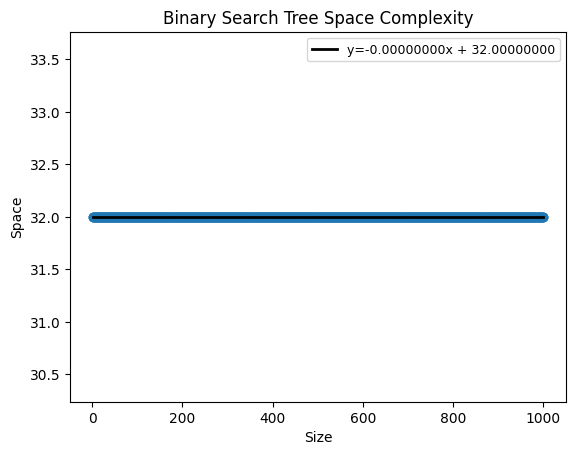

In [26]:
import timeit
import numpy as np
from matplotlib import pyplot as plt
# ADD YOUR TEST CODE HERE TO WORK ON SYNTHETIC DATA

# Create an object of class TestDataGenerator and use the object to generateData
SyntheticTest = TestDataGenerator()
num_data = 1000
data = SyntheticTest.generateData(num_data)

ss = SequentialSearchSet()
ss_insert_time_data = []
ss_search_time_data = []
ss_space_data = []
for iteration in range(len(data)):
    ss_insert_start_time = timeit.default_timer()
    ss.insertElement(data[iteration])
    ss_insert_end_time = timeit.default_timer()
    ss_insert_time = ss_insert_end_time - ss_insert_start_time
    ss_insert_time_data.append(ss_insert_time)
    ss_space = ss.__sizeof__()
    ss_space_data.append(ss_space)
    ss_tot_search_time = 0
    for id in range(iteration + 1):
        value = data[id]
        ss_search_start_time = timeit.default_timer()
        ss.searchElement(value)
        ss_search_end_time = timeit.default_timer()
        ss_tot_search_time += (ss_search_end_time - ss_search_start_time)
    ss_av_search_time = ss_tot_search_time / (iteration + 1)
    ss_search_time_data.append(ss_av_search_time)

bst = BinarySearchTreeSet()
bst_insert_time_data_for_synthetic = []
bst_search_time_data_for_synthetic = []
bst_space_data_for_synthetic = []
for iteration in range(len(data)):
    bst_insert_start_time = timeit.default_timer()
    bst.insertElement(data[iteration])
    bst_insert_end_time = timeit.default_timer()
    bst_insert_time = bst_insert_end_time - bst_insert_start_time
    bst_insert_time_data_for_synthetic.append(bst_insert_time)
    bst_space = bst.__sizeof__()
    bst_space_data_for_synthetic.append(bst_space)
    bst_tot_search_time = 0
    for id in range(iteration + 1):
        value = data[id]
        bst_search_start_time = timeit.default_timer()
        bst.searchElement(value)
        bst_search_end_time = timeit.default_timer()
        bst_tot_search_time += (bst_search_end_time - bst_search_start_time)
    bst_av_search_time = bst_tot_search_time / (iteration + 1)
    bst_search_time_data_for_synthetic.append(bst_av_search_time)

bal = BalancedSearchTreeSet()
bal_insert_time_data_for_synthetic = []
bal_search_time_data_for_synthetic = []
bal_space_data_for_synthetic = []
for iteration in range(len(data)):
    bal_insert_start_time = timeit.default_timer()
    bal.insertElement(data[iteration])
    bal_insert_end_time = timeit.default_timer()
    bal_insert_time = bal_insert_end_time - bal_insert_start_time
    bal_insert_time_data_for_synthetic.append(bal_insert_time)
    bal_space = bal.__sizeof__()
    bal_space_data_for_synthetic.append(bal_space)
    bal_tot_search_time = 0
    for id in range(iteration + 1):
        value = data[id]
        bal_search_start_time = timeit.default_timer()
        bal.searchElement(value)
        bal_search_end_time = timeit.default_timer()
        bal_tot_search_time += (bal_search_end_time - bal_search_start_time)
    bal_av_search_time = bal_tot_search_time / (iteration + 1)
    bal_search_time_data_for_synthetic.append(bal_av_search_time)

# bf = BloomFilterSet()
# bf_insert_time_data_for_synthetic = []
# bf_search_time_data_for_synthetic = []
# bf_space_data_for_synthetic = []
# for iteration in range(num_data):
#     bf_insert_start_time = timeit.default_timer()
#     bf.insertElement(data[iteration])
#     bf_insert_end_time = timeit.default_timer()
#     bf_insert_time = bf_insert_end_time - bf_insert_start_time
#     bf_insert_time_data_for_synthetic.append(bf_insert_time)
#     bf_space = bal.__sizeof__()
#     bf_space_data_for_synthetic.append(bal_space)
#     bf_tot_search_time = 0
#     for id in range(iteration + 1):
#         value = data[id]
#         bf_search_start_time = timeit.default_timer()
#         bf.searchElement(value)
#         bf_search_end_time = timeit.default_timer()
#         bf_tot_search_time += (bf_search_end_time - bf_search_start_time)
#     bf_av_search_time = bf_tot_search_time / (iteration + 1)
#     bf_search_time_data_for_synthetic.append(bf_av_search_time)

# ADD YOUR TEST CODE HERE TO WORK ON SYNTHETIC DATA

# Create an object of class TestDataGenerator and use the object to generateData
SyntheticTest = TestDataGenerator()
data = SyntheticTest.generateData(10)

# Sequential Search
ss = SequentialSearchSet()
random.shuffle(data)
start = timeit.default_timer()
for value in data:
    ss.insertElement(value)
# ss_space = sys.getsizeof(ss)
ss_space = ss.__sizeof__()
for value in data:
    ss.searchElement(value)
ss_time = timeit.default_timer() - start

# Binary Search tree
bst = BinarySearchTreeSet()
start = timeit.default_timer()
for value in data:
    bst.insertElement(value)
# bst_space = sys.getsizeof(bst)
bst_space = bst.__sizeof__()
for value in data:
    bst.searchElement(value)
bst_time = timeit.default_timer() - start

# Balanced Search Tree
avl = BalancedSearchTreeSet()
start = timeit.default_timer()
for value in data:
    avl.insertElement(value)
# avl_space = sys.getsizeof(avl)
avl_space = bst.__sizeof__()
for value in data:
    avl.searchElement(value)
avl_time = timeit.default_timer() - start

# # Bloom Filter 
# bf = BloomFilterSet()
# start = timeit.default_timer()
# for value in data:
#     bf.insertElement(str(value))
# # bf_space = sys.getsizeof(bf)
# bf_space = bf.__sizeof__()
# for value in data:
#     bf.searchElement(str(value))
# bf_time = timeit.default_timer() - start

# Time taken for each algorithm to insert the data and then search for the data
print(f"Sequential Search: {ss_time:.6f} seconds")
print(f"Binary Search Tree: {bst_time:.6f} seconds")
print(f"Balanced Search Tree: {avl_time:.6f} seconds")
# print(f"Bloom Filter: {bf_time:.6f} seconds")

print("\n")

# Space used by each algorithm
print(f"Sequential Search size: {ss_space} bytes")
print(f"Binary Search Tree size: {bst_space} bytes")
print(f"Balanced Search Tree size: {avl_space} bytes")
# print(f"Bloom Filter size: {bf_space} bytes")

    
#-------------------------- Accuracy test for bloom filter-----------------------#

# Data for the bloom filter
# BFTest = TestDataGenerator()
# BFdata = BFTest.generateData(1000)

# bf2 = BloomFilterSet()

# # insert 500 integers in the Bloom Filter
# for i in range(500):
#     bf2.insertElement(str(i))

# # Test the Bloom Filter with 1000 integers
# false_positives = 0
# for i in range(1000):
#     if i < 500:
#         if not bf.searchElement(str(i)):
#             print(f"Error: {i} should be a member of the Bloom Filter")
#     else:
#         if bf.searchElement(str(i)):
#             false_positives += 1

# print(f"False positives: {false_positives}") 

# Print results
# for num_data_have in range(num_data):
#     print(f"When there are {num_data_have + 1} elements")
#     print(f"Sequential Search insert time: {ss_insert_time_data[num_data_have]:.6f} seconds")
#     print(f"Sequential Search search time: {ss_search_time_data[num_data_have]:.6f} seconds")
#     print(f"Sequential Search space: {ss_space_data[num_data_have]} bytes")
#     print(f"Binary Search Tree insert time: {bst_insert_time_data_for_synthetic[num_data_have]:.6f} seconds")
#     print(f"Binary Search Tree search time: {bst_search_time_data_for_synthetic[num_data_have]:.6f} seconds")
#     print(f"Binary Search Tree space: {bst_space_data_for_synthetic[num_data_have]} bytes")
    # print(f"Balanced Search Tree insert time: {bal_insert_time_data_for_synthetic[num_data_have]:.6f} seconds")
    # print(f"Balanced Search Tree search time: {bal_search_time_data_for_synthetic[num_data_have]:.6f} seconds")
    # print(f"Balanced Search Tree space: {bal_space_data_for_synthetic[num_data_have]} bytes")
    # print(f"Bloom Filter insert time: {bf_insert_time_data_for_synthetic[num_data_have]:.6f} seconds")
    # print(f"Bloom Filter search time: {bf_search_time_data_for_synthetic[num_data_have]:.6f} seconds")
    # print(f"Bloom Filter space: {bf_space_data_for_synthetic[num_data_have]} bytes")

#-------------------------- Plot-----------------------#
# Used this piece of code below as archetype. (change title, xlabel, ylabel, scatter, polyfit and plot(in case))
x = np.arange(1, 1001)
plt.title("Binary Search Tree Space Complexity")
plt.xlabel("Size")
plt.ylabel("Space")
plt.scatter(x, bst_space_data_for_synthetic)
slope , intercept = np.polyfit(x, bst_space_data_for_synthetic, deg=1)
plt.plot(x, intercept + slope * x, color="k", lw=2, label='y={:.8f}x + {:.8f}'.format(slope, intercept))
plt.legend(fontsize=9)
plt.show()